# Date: 17-10-2023

# Project Title: Stock Price Prediction

# Team ID: 3879

###  1.Importing required packages:

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns


### 2. Loading the dataset:

In [2]:
data = pd.read_csv("MSFT.csv")

### 3.Display the maximum columns:

In [5]:
pd.options.display.max_columns = None

In [6]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.062549,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064783,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065899,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.064224,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.063107,47894400
...,...,...,...,...,...,...,...
8520,2019-12-31,156.770004,157.770004,156.449997,157.699997,157.699997,18369400
8521,2020-01-02,158.779999,160.729996,158.330002,160.619995,160.619995,22622100
8522,2020-01-03,158.320007,159.949997,158.059998,158.619995,158.619995,21116200
8523,2020-01-06,157.080002,159.100006,156.509995,159.029999,159.029999,20813700


### 4.Displaying top 5 Rows of data:

In [7]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.062549,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064783,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065899,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.064224,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.063107,47894400


### 5.Displaying last 5 rows of data:

In [9]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
8520,2019-12-31,156.770004,157.770004,156.449997,157.699997,157.699997,18369400
8521,2020-01-02,158.779999,160.729996,158.330002,160.619995,160.619995,22622100
8522,2020-01-03,158.320007,159.949997,158.059998,158.619995,158.619995,21116200
8523,2020-01-06,157.080002,159.100006,156.509995,159.029999,159.029999,20813700
8524,2020-01-07,159.320007,159.669998,157.330002,157.580002,157.580002,18017762


### 6.Shows number of rows and columns:

In [10]:
print("Number of columns ",data.shape[1])
print("Number of rows ",data.shape[0])

Number of columns  7
Number of rows  8525


### 7.Getting basic information about the dataset:

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8525 entries, 0 to 8524
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8525 non-null   object 
 1   Open       8525 non-null   float64
 2   High       8525 non-null   float64
 3   Low        8525 non-null   float64
 4   Close      8525 non-null   float64
 5   Adj Close  8525 non-null   float64
 6   Volume     8525 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 466.3+ KB


### 8.Data Exploration: 

In [13]:
data['Date'].unique()

array(['1986-03-13', '1986-03-14', '1986-03-17', ..., '2020-01-03',
       '2020-01-06', '2020-01-07'], dtype=object)

In [14]:
data['Date'].nunique()

8525

In [17]:
data['Date'].head(2)

0    1986-03-13
1    1986-03-14
Name: Date, dtype: object

### 9.Checking null values presence:

In [20]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### 10.Handling Missing Values:

In [22]:
data.dropna(inplace=True)

In [23]:
# Print the first 5 rows of the dataframe
print(data.head())

         Date      Open      High       Low     Close  Adj Close      Volume
0  1986-03-13  0.088542  0.101563  0.088542  0.097222   0.062549  1031788800
1  1986-03-14  0.097222  0.102431  0.097222  0.100694   0.064783   308160000
2  1986-03-17  0.100694  0.103299  0.100694  0.102431   0.065899   133171200
3  1986-03-18  0.102431  0.103299  0.098958  0.099826   0.064224    67766400
4  1986-03-19  0.099826  0.100694  0.097222  0.098090   0.063107    47894400


In [26]:
data


,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.062549,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064783,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065899,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.064224,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.063107,47894400
...,...,...,...,...,...,...,...
8520,2019-12-31,156.770004,157.770004,156.449997,157.699997,157.699997,18369400
8521,2020-01-02,158.779999,160.729996,158.330002,160.619995,160.619995,22622100
8522,2020-01-03,158.320007,159.949997,158.059998,158.619995,158.619995,21116200
8523,2020-01-06,157.080002,159.100006,156.509995,159.029999,159.029999,20813700


### 11.Split the dataset into features (X) and target (Y):


In [ ]:
X = df.drop('Date', axis=1)
Y = df['Open']

### 12.Print the shape of the training and testing sets:


In [43]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('Y_train shape:', Y_train.shape)
print('Y_test shape:', Y_test.shape)

X_train shape: (6820, 6)
X_test shape: (1705, 6)
Y_train shape: (6820,)
Y_test shape: (1705,)


### 13.Feature Scaling.(import StandardScaler):

In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [45]:
#Select the columns you want to scale
cols_to_scale = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [46]:
#Create a Standard Scalar object
scaler = StandardScaler()

In [47]:
#Fit the scalar to the selected coloumn
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [48]:
print(df.head())

         Date      Open      High       Low     Close  Adj Close     Volume
0  1986-03-13 -0.982764 -0.984942 -0.981026 -0.982615  -0.828391  24.963577
1  1986-03-14 -0.982461 -0.984912 -0.980720 -0.982494  -0.828312   6.366058
2  1986-03-17 -0.982340 -0.984882 -0.980598 -0.982433  -0.828272   1.868783
3  1986-03-18 -0.982279 -0.984882 -0.980659 -0.982524  -0.828331   0.187856
4  1986-03-19 -0.982370 -0.984972 -0.980720 -0.982585  -0.828371  -0.322861


### 14.Finding relationship each column using heatmap:

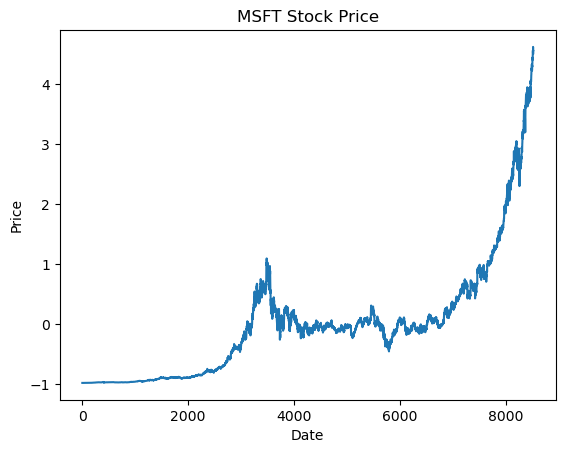

In [49]:
# Plot the 'Close' column
plt.plot(df['Close'])
plt.title('MSFT Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

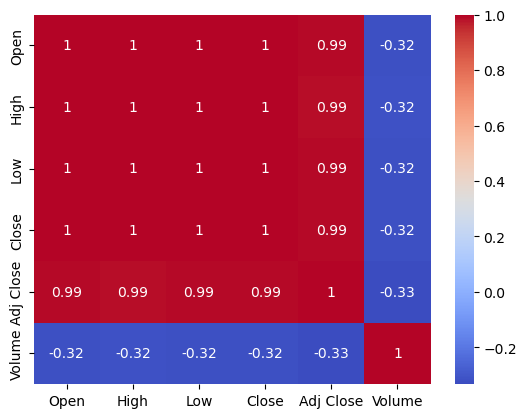

In [52]:
# Load the dataset into a pandas dataframe:

df = pd.read_csv('MSFT.csv', index_col=0, parse_dates=True)


# Create a correlation matrix:

corr_matrix = df.corr()


# Create a heatmap using seaborn:

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()
